**load dataset**

In [1]:
# prompt: unzip /content/drive/MyDrive/DataSets_Term3/PneumoniaDetection/pneumonia.zip  to /content/drive/MyDrive/DataSets_Term3/PneumoniaDetection/Pneumonia_data

# !unzip /content/drive/MyDrive/DataSets_Term3/PneumoniaDetection/pneumonia.zip -d /content/drive/MyDrive/DataSets_Term3/PneumoniaDetection/Pneumonia_data


**EDA**

In [ ]:
# root_dir = 'chest_xray'

In [2]:
# prompt: explore and print 5 images in each subfolder of  the data in val, test, train of root_dir make he image size printed very small like 10x12 display

import matplotlib.pyplot as plt
import os
import cv2

def explore_images(root_dir):
  for subdir, dirs, files in os.walk(root_dir):
    if subdir != root_dir:
      print(f"Exploring subdirectory: {subdir}")
      image_count = 0
      for file in files:
          if file.endswith(('.png', '.jpg', '.jpeg')):
              if image_count < 5:
                  image_path = os.path.join(subdir, file)
                  img = cv2.imread(image_path)
                  img = cv2.resize(img,(150,100))
                  plt.figure(figsize=(1,1))  # Set figure size
                  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert to RGB
                  plt.axis('off')
                  plt.show()
                  image_count += 1
              else:
                break
explore_images('chest_xray')


In [3]:
# checking for different file formats

import os

def check_file_formats(root_dir):
  for subdir, _, files in os.walk(root_dir):
    if subdir != root_dir:
      formats = set()
      for file in files:
        formats.add(file.split('.')[-1].lower())
      print(f"Subdirectory: {subdir}, Formats: {formats}") # if you want to print
check_file_formats('chest_xray')

In [4]:
#total number of images in each of the sub folders

import os

def count_images_in_subfolders(root_dir):
  for subdir, _, files in os.walk(root_dir):
    if subdir != root_dir:
      image_count = 0
      for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
          image_count += 1
      print(f"Subdirectory: {subdir}, Image count: {image_count}")

count_images_in_subfolders('chest_xray')

In [5]:
#checking for missing images

import os
import cv2
import numpy as np
import pandas as pd

# Define paths
# data_dir = root_dir
# normal_dir = "C:\Users\Joel\Downloads\CNN\chest_xray\train\NORMAL"
# pneumonia_dir = "C:\Users\Joel\Downloads\CNN\chest_xray\train\PNEUMONIA"

# Check for missing images
def check_missing_images(directory):
    for filename in os.listdir(directory):
        if not os.path.isfile(os.path.join(directory, filename)):
            print(f'Missing image: {filename}')

check_missing_images('train/NORMAL')
check_missing_images('train/PNEUMONIA')

In [6]:
# Exploring data

import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import numpy as np

# Define paths
# data_dir = "chest_xray/"  # Use the root_dir from previous cells
normal_dir = "train/NORMAL"
pneumonia_dir = "train/PNEUMONIA"

# Load image data and labels
X = []
y = []

# Function to load images and labels from a directory
def load_images_and_labels(directory, label):
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (150, 100))  # Resize images for consistency
            X.append(img)
            y.append(label)

# Load normal images and assign label 0
load_images_and_labels(normal_dir, 0)

# Load pneumonia images and assign label 1
load_images_and_labels(pneumonia_dir, 1)

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# # # Feature Engineering

# # from sklearn.model_selection import train_test_split
# # from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # # Split the dataset
# # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Data augmentation
# # train_datagen = ImageDataGenerator(
# #     rescale=1./255,
# #     rotation_range=20,
# #     width_shift_range=0.2,
# #     height_shift_range=0.2,
# #     shear_range=0.2,
# #     zoom_range=0.2,
# #     horizontal_flip=True
# # )

# # val_datagen = ImageDataGenerator(rescale=1./255)

# # train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
# # val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# ###############################################################################################################

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define paths
# train_data_dir = 'train/'
# test_data_dir = 'val/'
# val_data_dir = 'test/'

# # Data augmentation for training data
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # Normalization for validation and test data
# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Create generators
# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary'  # Assuming binary classification (normal vs pneumonia)
# )

# val_generator = val_datagen.flow_from_directory(
#     val_data_dir,
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary'
# )

# test_generator = test_datagen.flow_from_directory(
#     test_data_dir,
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary',
#     shuffle=False  # Important for evaluation
# )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# # model selection

# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Build a simple CNN model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))  # Binary classification

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Joel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_data_dir = 'train/'
test_data_dir = 'val/'
val_data_dir = 'test/'

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



# Normalization for validation and test data
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for evaluation
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Joel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# hyper parameter tuning

from keras.callbacks import EarlyStopping

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=[early_stopping])

Epoch 1/50


c:\Users\Joel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 620ms/step - accuracy: 0.7377 - loss: 0.5881 - val_accuracy: 0.7901 - val_loss: 0.4793
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 640ms/step - accuracy: 0.8146 - loss: 0.3787 - val_accuracy: 0.7452 - val_loss: 0.5611
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 627ms/step - accuracy: 0.8345 - loss: 0.3476 - val_accuracy: 0.8205 - val_loss: 0.4402
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 610ms/step - accuracy: 0.8533 - loss: 0.3117 - val_accuracy: 0.8205 - val_loss: 0.4481
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 630ms/step - accuracy: 0.8843 - loss: 0.2679 - val_accuracy: 0.8782 - val_loss: 0.3365
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 577ms/step - accuracy: 0.9000 - loss: 0.2378 - val_accuracy: 0.8526 - val_loss: 0.4168
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 563ms/step - accuracy: 0.9046 - loss: 0.2299 - val_accuracy: 0.7965 - val_loss: 0.4219
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 554ms/step - accuracy: 0.8932 - loss: 0.2536 

In [17]:
model.save('better_models/pneumonia_detection_cnn_model.h5')

In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6250 - loss: 0.6230
Test Loss: 0.6230
Test Accuracy: 0.6250


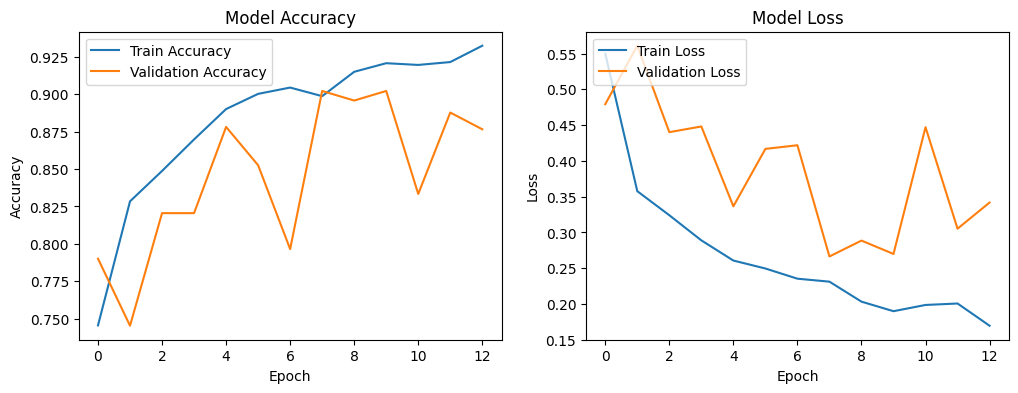

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()